# <center>Лабораторна робота №4. <br> Візуальний аналіз даних про пасажирів Титаніку</center>

**Заповніть код в клітинках замість "Ваш код тут"**

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Зчитуємо навчальну вибірку.**

In [76]:
train_df = pd.read_csv("lab4/data/titanic_train.csv", index_col='PassengerId') 

In [77]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [78]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Відкинемо ознаку `Cabin`, а потім – всі рядки, де є пропуски.**

In [80]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності ознак `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas чи `pairplot` Seaborn).**

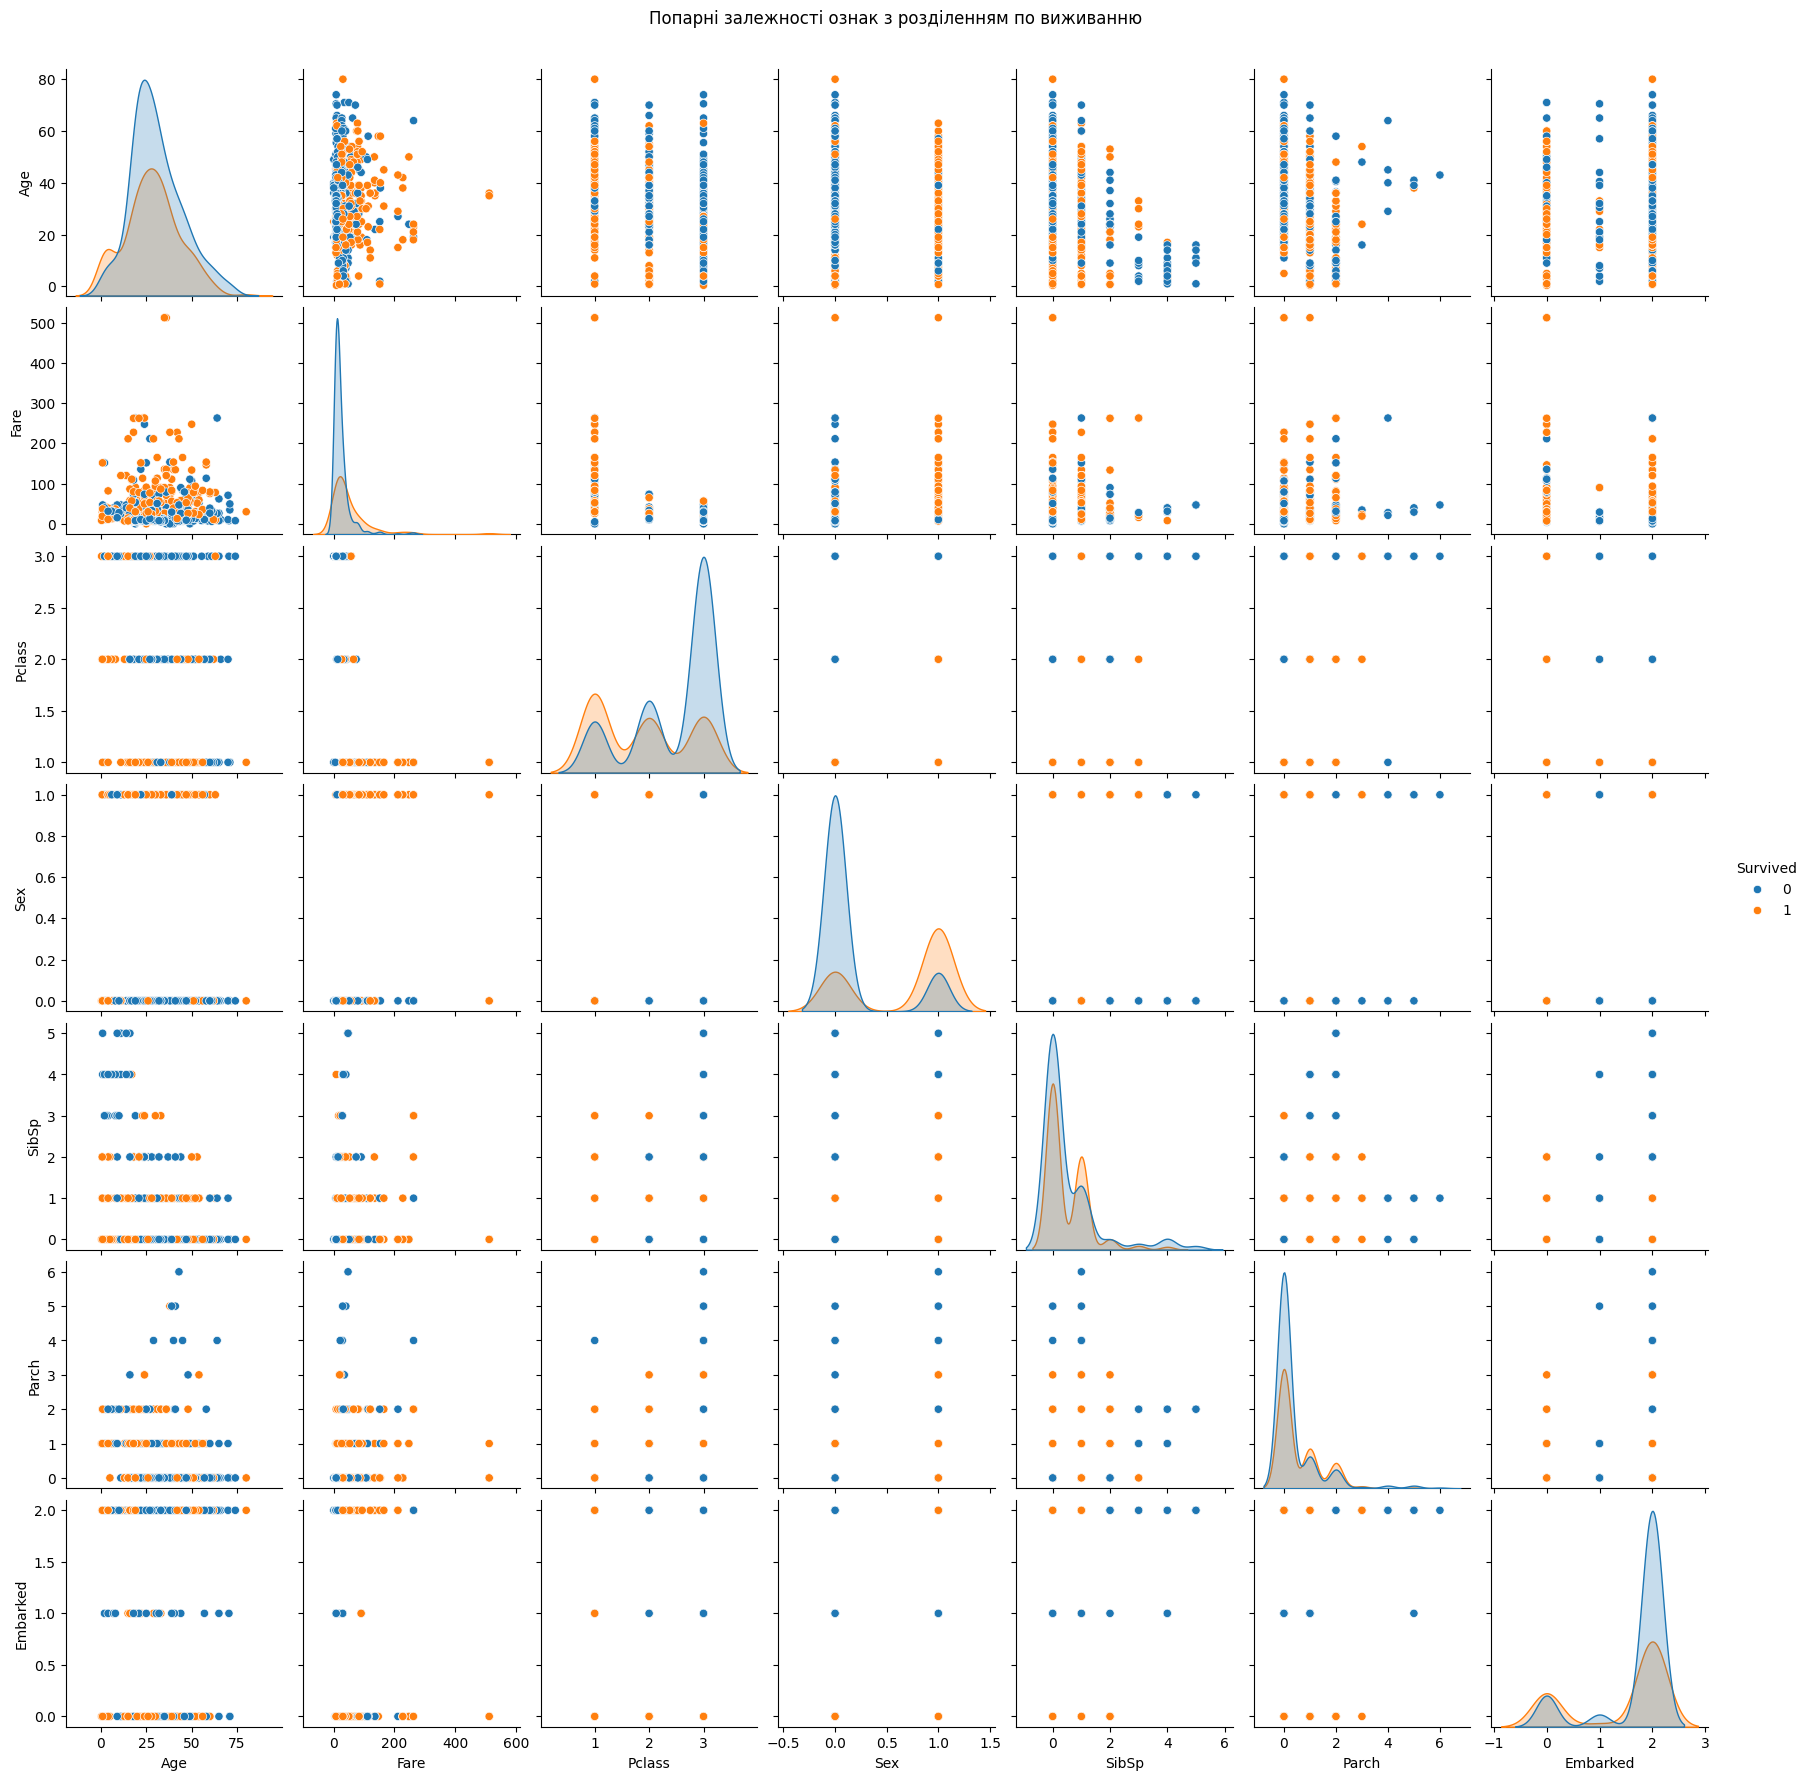

In [81]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

analyzed_features = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

sns.pairplot(train_df[analyzed_features], hue='Survived')
plt.suptitle('Попарні залежності ознак з розділенням по виживанню', y=1.02)
plt.show()

**Як плата за білет (`Fare`) залежить від класу каюти (`Pclass`)? Побудуйте boxplot.**

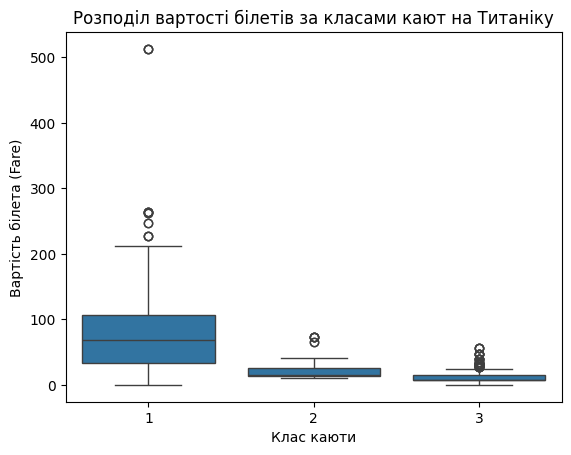

Висновок:
• 1-й клас: найвища вартість білетів, великий розкид значень
• 2-й клас: середня вартість, менший розкид ніж у 1-го класу
• 3-й клас: найнижча вартість, найменший розкид значень
• Видно чітку залежність: чим вищий клас каюти, тим дорожчий білет


In [82]:
sns.boxplot(x='Pclass', y='Fare', data=train_df[['Pclass', 'Fare']])
plt.title('Розподіл вартості білетів за класами кают на Титаніку')
plt.xlabel('Клас каюти')
plt.ylabel('Вартість білета (Fare)')
plt.show()

print("Висновок:")
print("• 1-й клас: найвища вартість білетів, великий розкид значень")
print("• 2-й клас: середня вартість, менший розкид ніж у 1-го класу")
print("• 3-й клас: найнижча вартість, найменший розкид значень")
print("• Видно чітку залежність: чим вищий клас каюти, тим дорожчий білет")

**Такий boxplot виходить не дуже красивим із-за викидів.** 

**Опціонально: створіть ознаку `Fare_no_out` (вартість без викидів), в якій виключається вартість, що відрізняється від середнього по класу більш ніж на 2 стандартних відхилення. Важливо: потрібно виключити викиди саме в залежності від класу каюти. Інакше виключатися будуть тільки найбільші (1 клас) і малі (3 клас) вартості.**

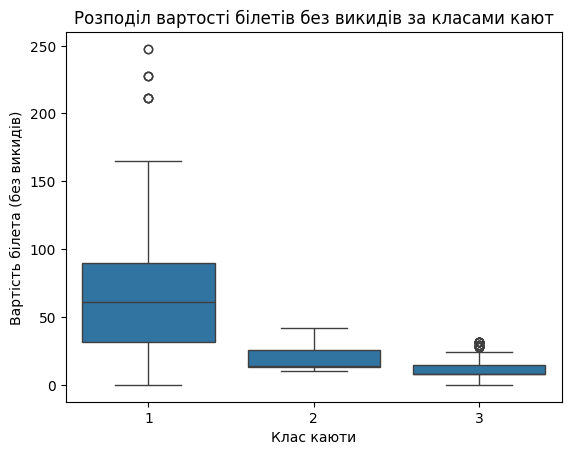

Статистика виключених викидів:
Клас 1: виключено 9 викидів з 184 записів (4.9%)
Клас 2: виключено 7 викидів з 173 записів (4.0%)
Клас 3: виключено 20 викидів з 355 записів (5.6%)


In [ ]:
train_df['Fare_no_out'] = train_df['Fare'].copy()

for pclass in [1, 2, 3]:
    class_mask = train_df['Pclass'] == pclass
    class_fares = train_df.loc[class_mask, 'Fare']
    
    mean_fare = class_fares.mean()
    std_fare = class_fares.std()
    lower_bound = mean_fare - 2 * std_fare
    upper_bound = mean_fare + 2 * std_fare
    
    outlier_mask = (class_fares < lower_bound) | (class_fares > upper_bound)
    train_df.loc[class_mask & outlier_mask, 'Fare_no_out'] = np.nan

sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df[['Pclass', 'Fare_no_out']])
plt.title('Розподіл вартості білетів без викидів за класами кают')
plt.xlabel('Клас каюти')
plt.ylabel('Вартість білета (без викидів)')
plt.show()

print("Статистика виключених викидів:")
for pclass in [1, 2, 3]:
    original_count = len(train_df[train_df['Pclass'] == pclass])
    no_out_count = len(train_df[(train_df['Pclass'] == pclass) & (train_df['Fare_no_out'].notna())])
    excluded = original_count - no_out_count
    print(f"Клас {pclass}: виключено {excluded} викидів з {original_count} записів ({excluded/original_count*100:.1f}%)")

**Яке відношення загиблих і виживших в залежності від статі? Відобразіть з допомогою Seaborn.countplot з аргументом hue.**

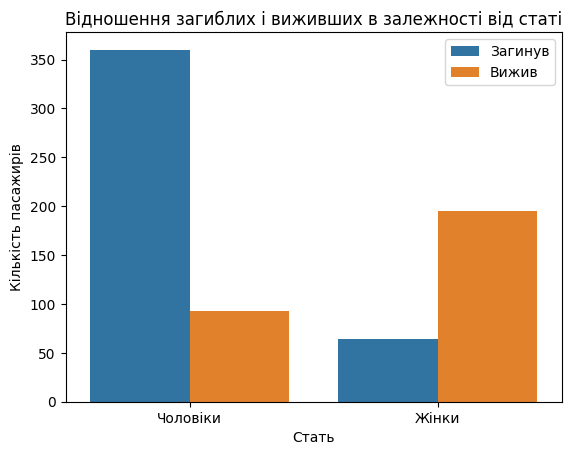

Висновок: Жінки мали значно вищий відсоток виживання порівняно з чоловіками, що підтверджує принцип 'жінки та діти першими'.


In [84]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Відношення загиблих і виживших в залежності від статі')
plt.xlabel('Стать')
plt.ylabel('Кількість пасажирів')
plt.legend(['Загинув', 'Вижив'])

plt.xticks([0, 1], ['Чоловіки', 'Жінки'])
plt.show()

print("Висновок: Жінки мали значно вищий відсоток виживання порівняно з чоловіками, що підтверджує принцип 'жінки та діти першими'.")

**Яке співідношення загиблих і виживших в залежності від класу каюти? Відобразівть за допомогою Seaborn.countplot з аргументом hue.**

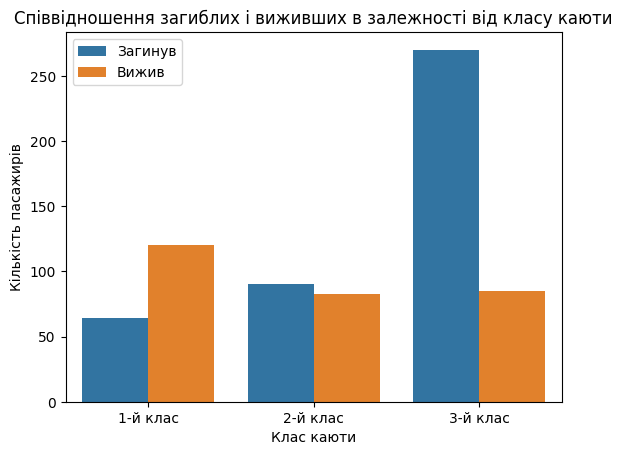

Висновок: Пасажири 1-го класу мали найвищий відсоток виживання, а 3-го класу - найнижчий, що показує вплив соціального статусу на шанси виживання.


In [85]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Співвідношення загиблих і виживших в залежності від класу каюти')
plt.xlabel('Клас каюти')
plt.ylabel('Кількість пасажирів')
plt.legend(['Загинув', 'Вижив'])

plt.xticks([0, 1, 2], ['1-й клас', '2-й клас', '3-й клас'])
plt.show()

print("Висновок: Пасажири 1-го класу мали найвищий відсоток виживання, а 3-го класу - найнижчий, що показує вплив соціального статусу на шанси виживання.")

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодші 30 років, похилого віку – старші 60 років.**

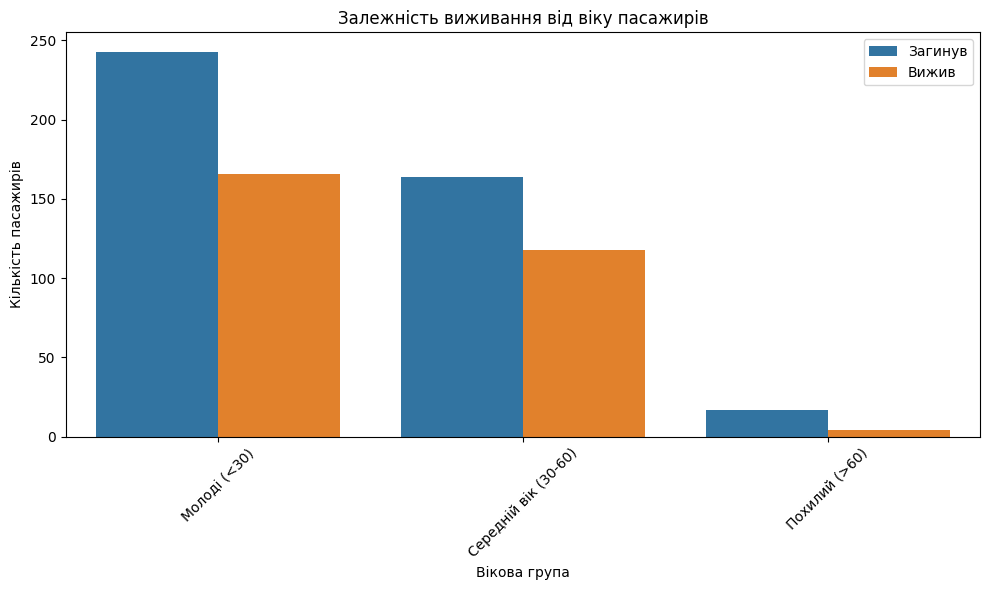

Висновок: Графік показує, що молоді пасажири (<30 років) мали вищий відсоток виживання порівняно з похилими (>60 років), що підтверджує припущення про те, що молоді частіше виживали під час катастрофи Титаніка.


In [86]:
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 30, 60, 100], labels=['Молоді (<30)', 'Середній вік (30-60)', 'Похилий (>60)'])

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Age_Group', hue='Survived')
plt.title('Залежність виживання від віку пасажирів')
plt.xlabel('Вікова група')
plt.ylabel('Кількість пасажирів')
plt.legend(['Загинув', 'Вижив'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Висновок: Графік показує, що молоді пасажири (<30 років) мали вищий відсоток виживання порівняно з похилими (>60 років), що підтверджує припущення про те, що молоді частіше виживали під час катастрофи Титаніка.")